In [1]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    !pip install PyDrive

    if os.path.exists('./fair-universe/'):
        !rm -r fair-universe
    if os.path.exists('./input_data/'):
        !rm -r input_data
    !git clone https://github.com/Ragansu/fair-universe.git fair-universe
    !ls
    !pwd

    import os
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    download = drive.CreateFile({'id': '1sJzBVEJQcQ76VKjFCGC8KBT0lVHAGKIl'})
    download.GetContentFile("reference_data.csv")
    !cp reference_data.csv fair-universe/Competition_Bundle_HEP/



## Directories

In [4]:
module_dir= (path[0])
root_dir = os.path.dirname(module_dir)

# Input data directory to read training data from

# Input data directory
input_dir = os.path.join(root_dir, 'input_data')

# Output data directory to write predictions to
output_dir = os.path.join(root_dir, 'sample_result_submission')

# Program directory
program_dir = os.path.join(root_dir, 'ingestion_program')

# Directory to read submitted submissions from
model_dir = os.path.join(root_dir, 'sample_code_submission')

# Directory to read visualizations from
visualizer_dir = os.path.join(root_dir, 'visualize')

# Score directory to read scoring code from
score_dir = os.path.join(root_dir, 'scoring_program')


In [5]:
# model_dir = '../sample_code_submission/'
# result_dir = '../sample_result_submission/' 
# problem_dir = '../ingestion_program/'  
# score_dir = '../scoring_program/'
# visualizer_dir = '../visualize/'

### Add directories to path

In [6]:
path.append(model_dir) 
path.append(program_dir)
path.append(score_dir)
path.append(root_dir)
path.append(visualizer_dir)

print(path)


['x:\\Fair Universe 2023\\fair-universe\\Competition_Bundle_HEP\\Starting_kit', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\THINKPAD\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', '', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packa

**Imports**

In [7]:
# from data_loader import get_settings_from_json

from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [8]:
# Init Ingestion
DataGenerator()

ingestion = Ingestion()

# Start timer
ingestion.start_timer()


PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_electron_flag
PRI_muon_flag
PRI_had_pt
PRI_had_eta
PRI_had_phi
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_n_jets
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
PRI_met
PRI_met_phi
DER_mass_transverse_lep_had
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_lep_had
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_had
DER_mass_transverse_met_lep
DER_deltar_had_lep
DER_met_phi_centrality
DER_lep_eta_centrality
[*] --- sum of weights : 2870527.862053714
[*] --- sum of signal : 9666.051853714003
[*] --- sum of background : 2860861.8102
sum of signal 9666.051853714001
sum of background 2860861.8102000006
Tau energy rescaling : 1.0
mu =  1.065
Shape of test set :  (7245, 32)
sum of signal 10294.345224205412
sum of background 2860861.8101999997
sum of weights 2871156.1554242056
mu =  1.064999999999951
Tau energy rescaling : 1.0
mu =  1.6
Shape of test set :  (7245, 32)

In [9]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [10]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [11]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,37.8826,-1.473060,1.850310,1,0,23.1210,-2.410600,-1.129220,23.1210,-2.410600,...,-7.000000,-7.000000,3.123550,23.767451,61.0036,1.638450,46.985083,3.123553,-0.508446,-7.000000
1,21.2784,0.135788,2.218920,1,0,50.9708,0.125191,-0.917811,50.9708,0.125191,...,-7.000000,-7.000000,3.136750,59.923395,72.2492,0.417463,4.305242,3.136749,1.414117,-7.000000
2,27.5551,-1.098790,1.921600,0,1,24.4121,1.761510,-2.209580,51.0399,0.303251,...,106.151918,-0.376880,3.579440,12.731650,173.2682,1.128748,48.856243,3.579447,1.307476,0.515758
3,32.2578,0.969328,-2.802460,0,1,51.0356,1.518600,-0.369348,51.0356,1.518600,...,56.440041,3.854480,2.494340,77.880021,165.2139,0.632065,10.652505,2.494340,-0.366300,0.013356
4,24.5958,0.671123,0.908893,0,1,230.9510,1.199450,0.367266,664.6780,0.117689,...,900.332241,0.141162,0.756628,278.864701,1191.7768,0.106498,34.652412,0.756630,1.387133,0.999461


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.506444,0.001345,-0.009992,0.448111,0.551889,44.471560,0.003570,0.002595,68.011742,0.005533,...,144.917077,-2.657420,2.586178,53.456477,174.627379,0.870824,20.597909,2.586178,0.492801,-2.593437
std,17.760933,1.189892,1.811253,0.497302,0.497302,23.807033,1.217006,1.814072,59.384425,1.557942,...,276.325187,4.262499,0.712312,37.453016,143.206712,0.543543,20.173400,0.712312,1.117542,3.641341
min,20.000100,-2.499920,-3.141550,0.000000,0.000000,22.917500,-2.673120,-3.141570,22.942400,-4.890660,...,-7.000000,-21.895106,0.517385,0.191404,43.302100,0.038801,0.000458,0.517385,-1.414214,-7.000000
25%,23.832300,-0.904799,-1.578537,0.000000,0.000000,31.023900,-0.936088,-1.570140,35.563225,-1.125910,...,-7.000000,-7.000000,2.148465,33.105250,69.658550,0.547234,5.816460,2.148462,-0.684958,-7.000000
50%,28.672400,-0.002911,-0.014527,0.000000,1.000000,38.755400,0.011364,0.018074,46.554850,0.014421,...,71.149298,-1.879418,2.842315,45.981900,139.572800,0.753276,14.294949,2.842315,1.124097,0.000002
75%,36.483200,0.905064,1.556812,1.000000,1.000000,49.415575,0.939410,1.570978,73.385025,1.134038,...,179.794710,0.472992,3.106038,62.731506,222.459250,1.035954,29.956991,3.106031,1.380620,0.461414
max,576.872000,2.499990,3.141540,1.000000,1.000000,673.323000,2.682640,3.141550,1575.320000,4.884370,...,6661.538071,17.944680,5.777640,1143.009736,2869.378200,13.625782,555.207055,5.777639,1.414214,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

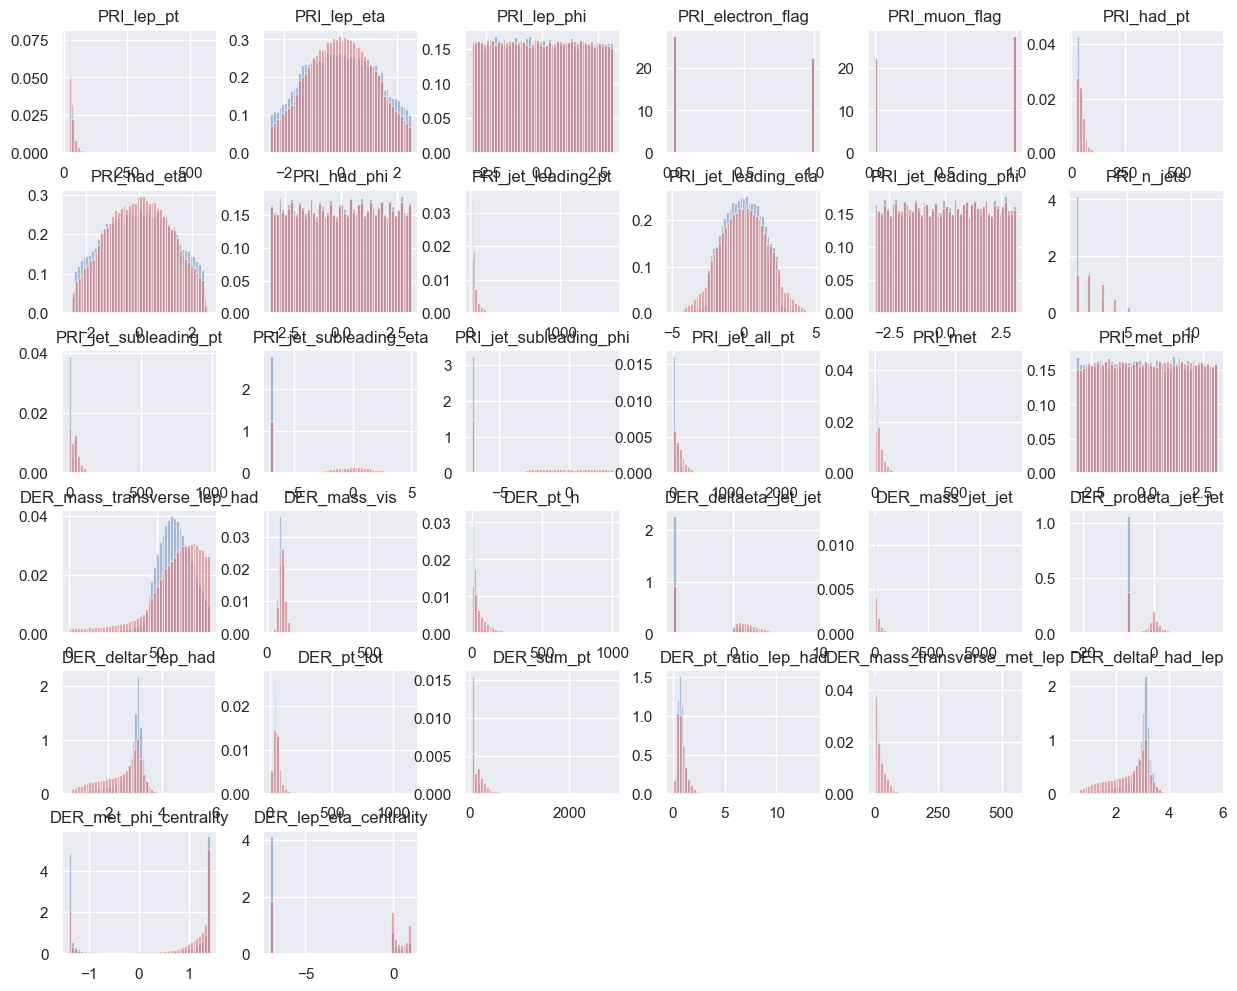

In [12]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


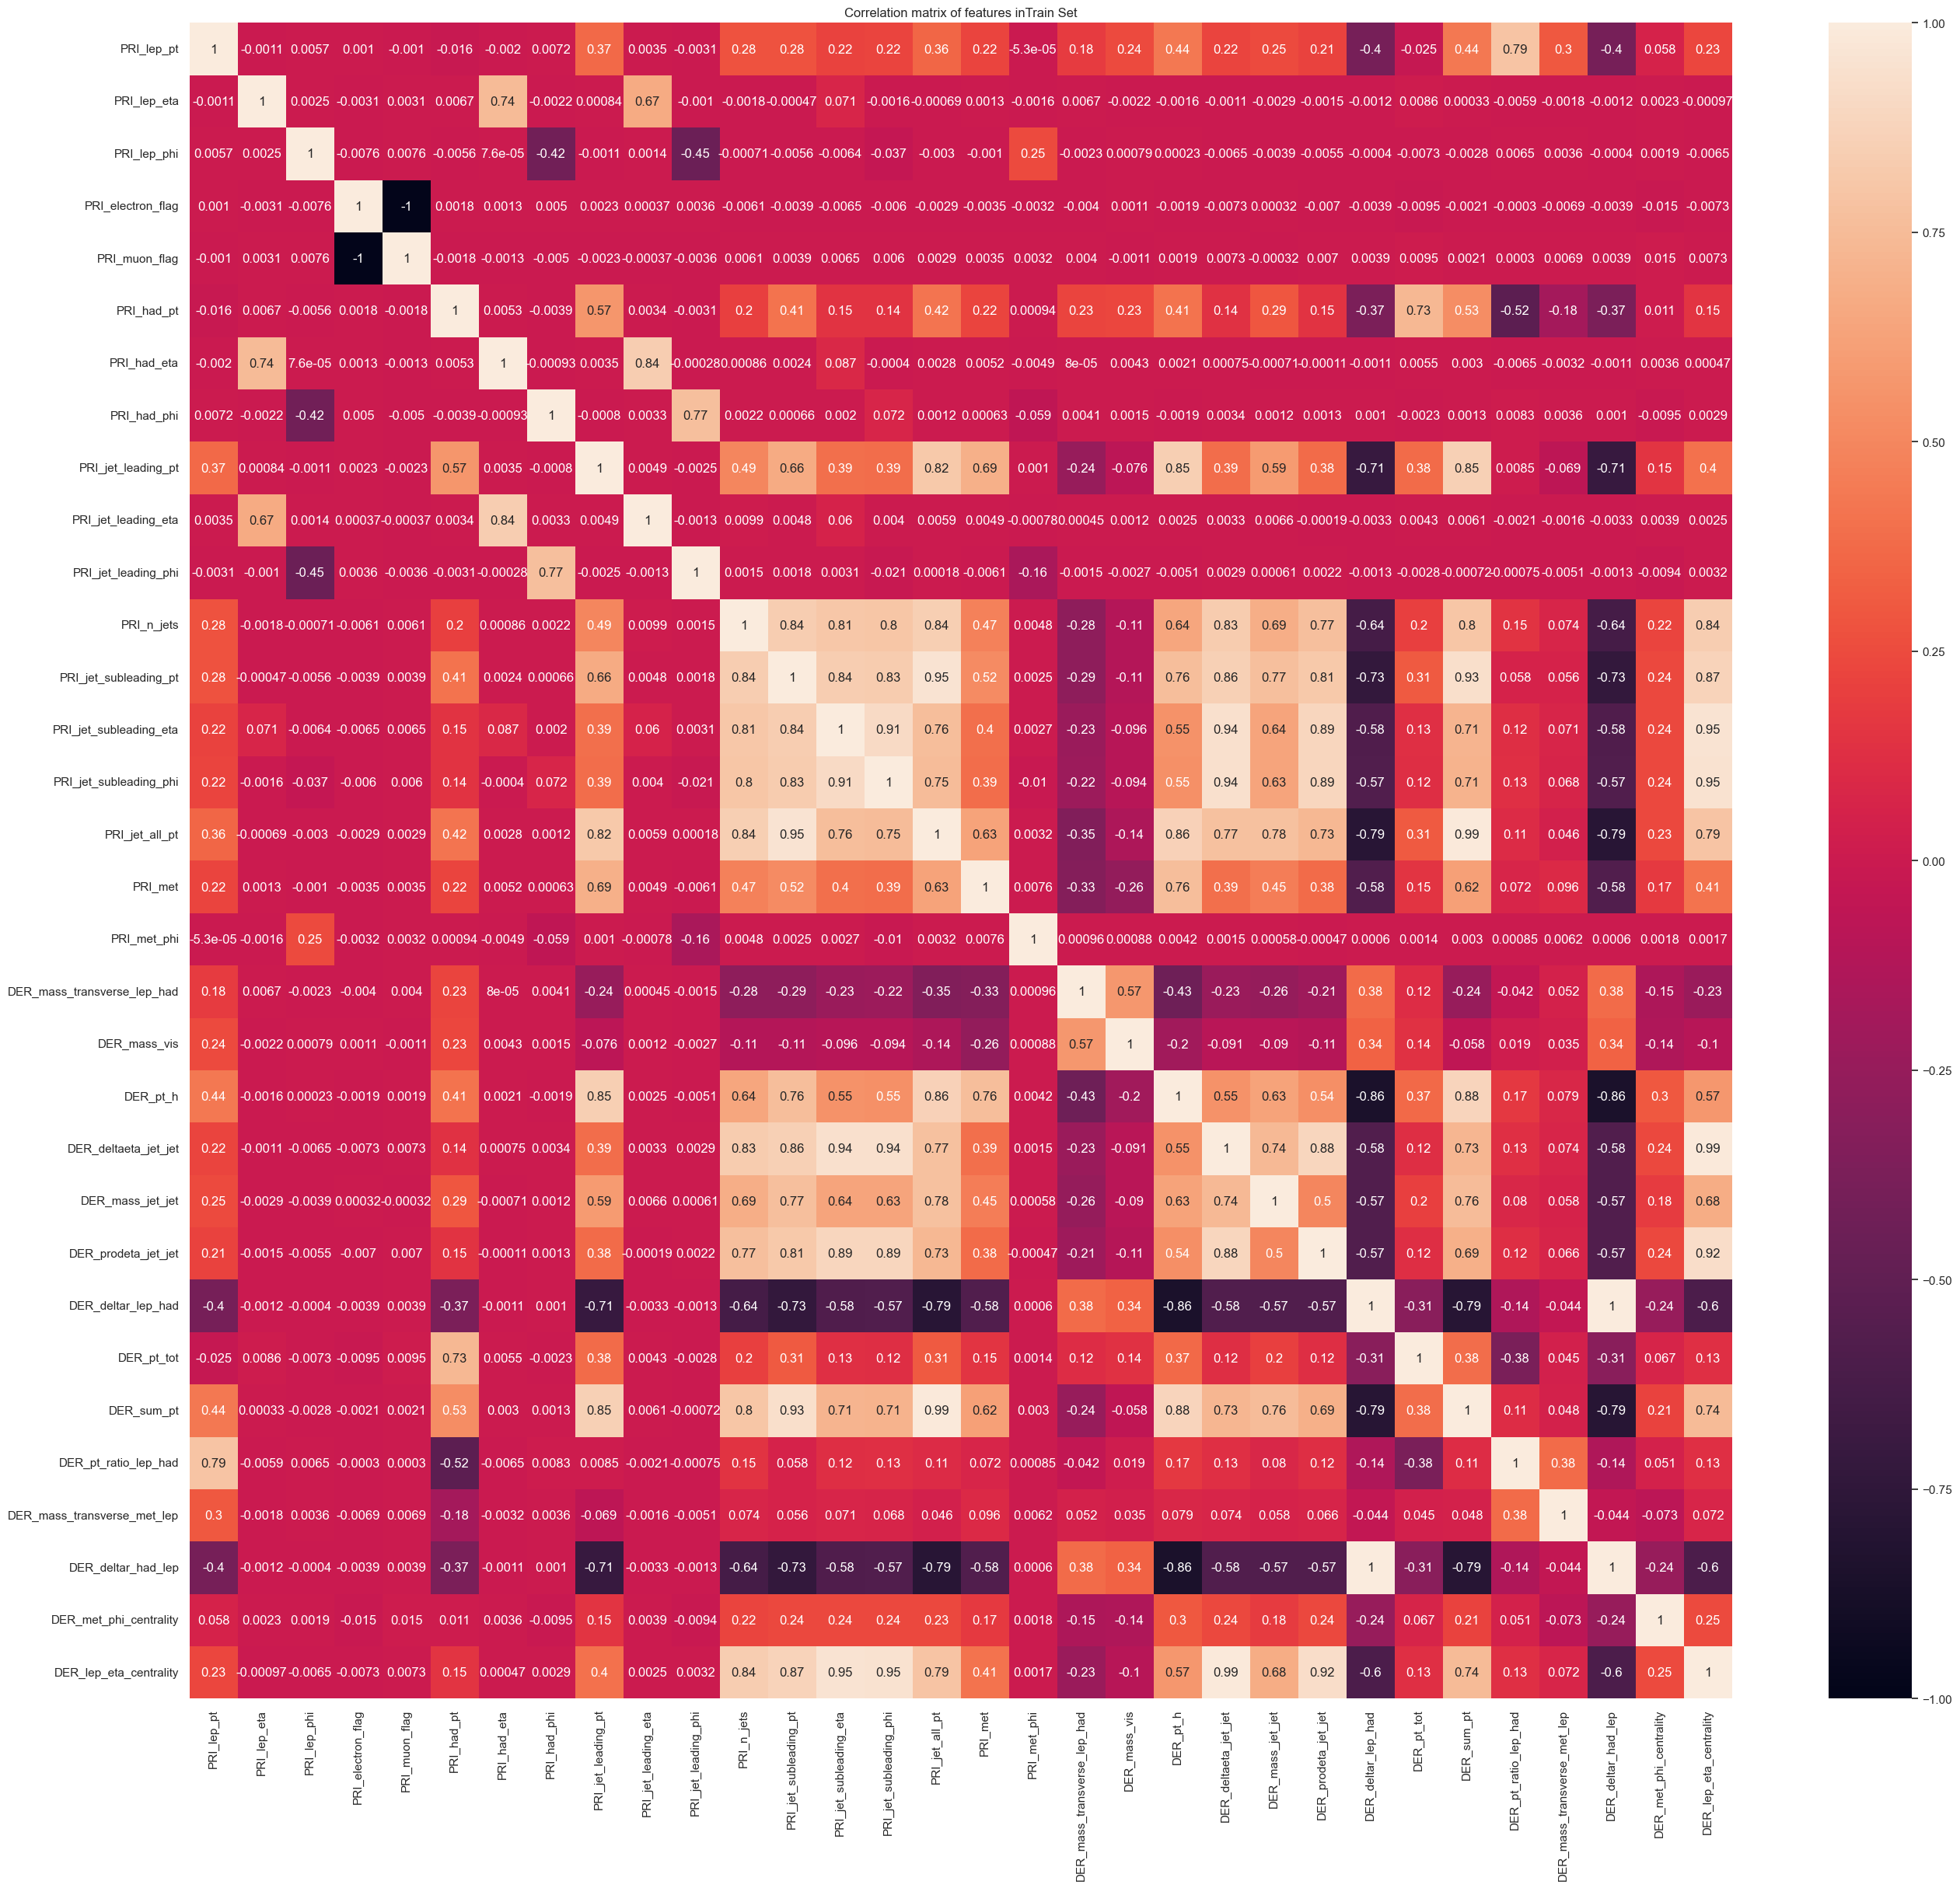

Background feature  correlation matrix


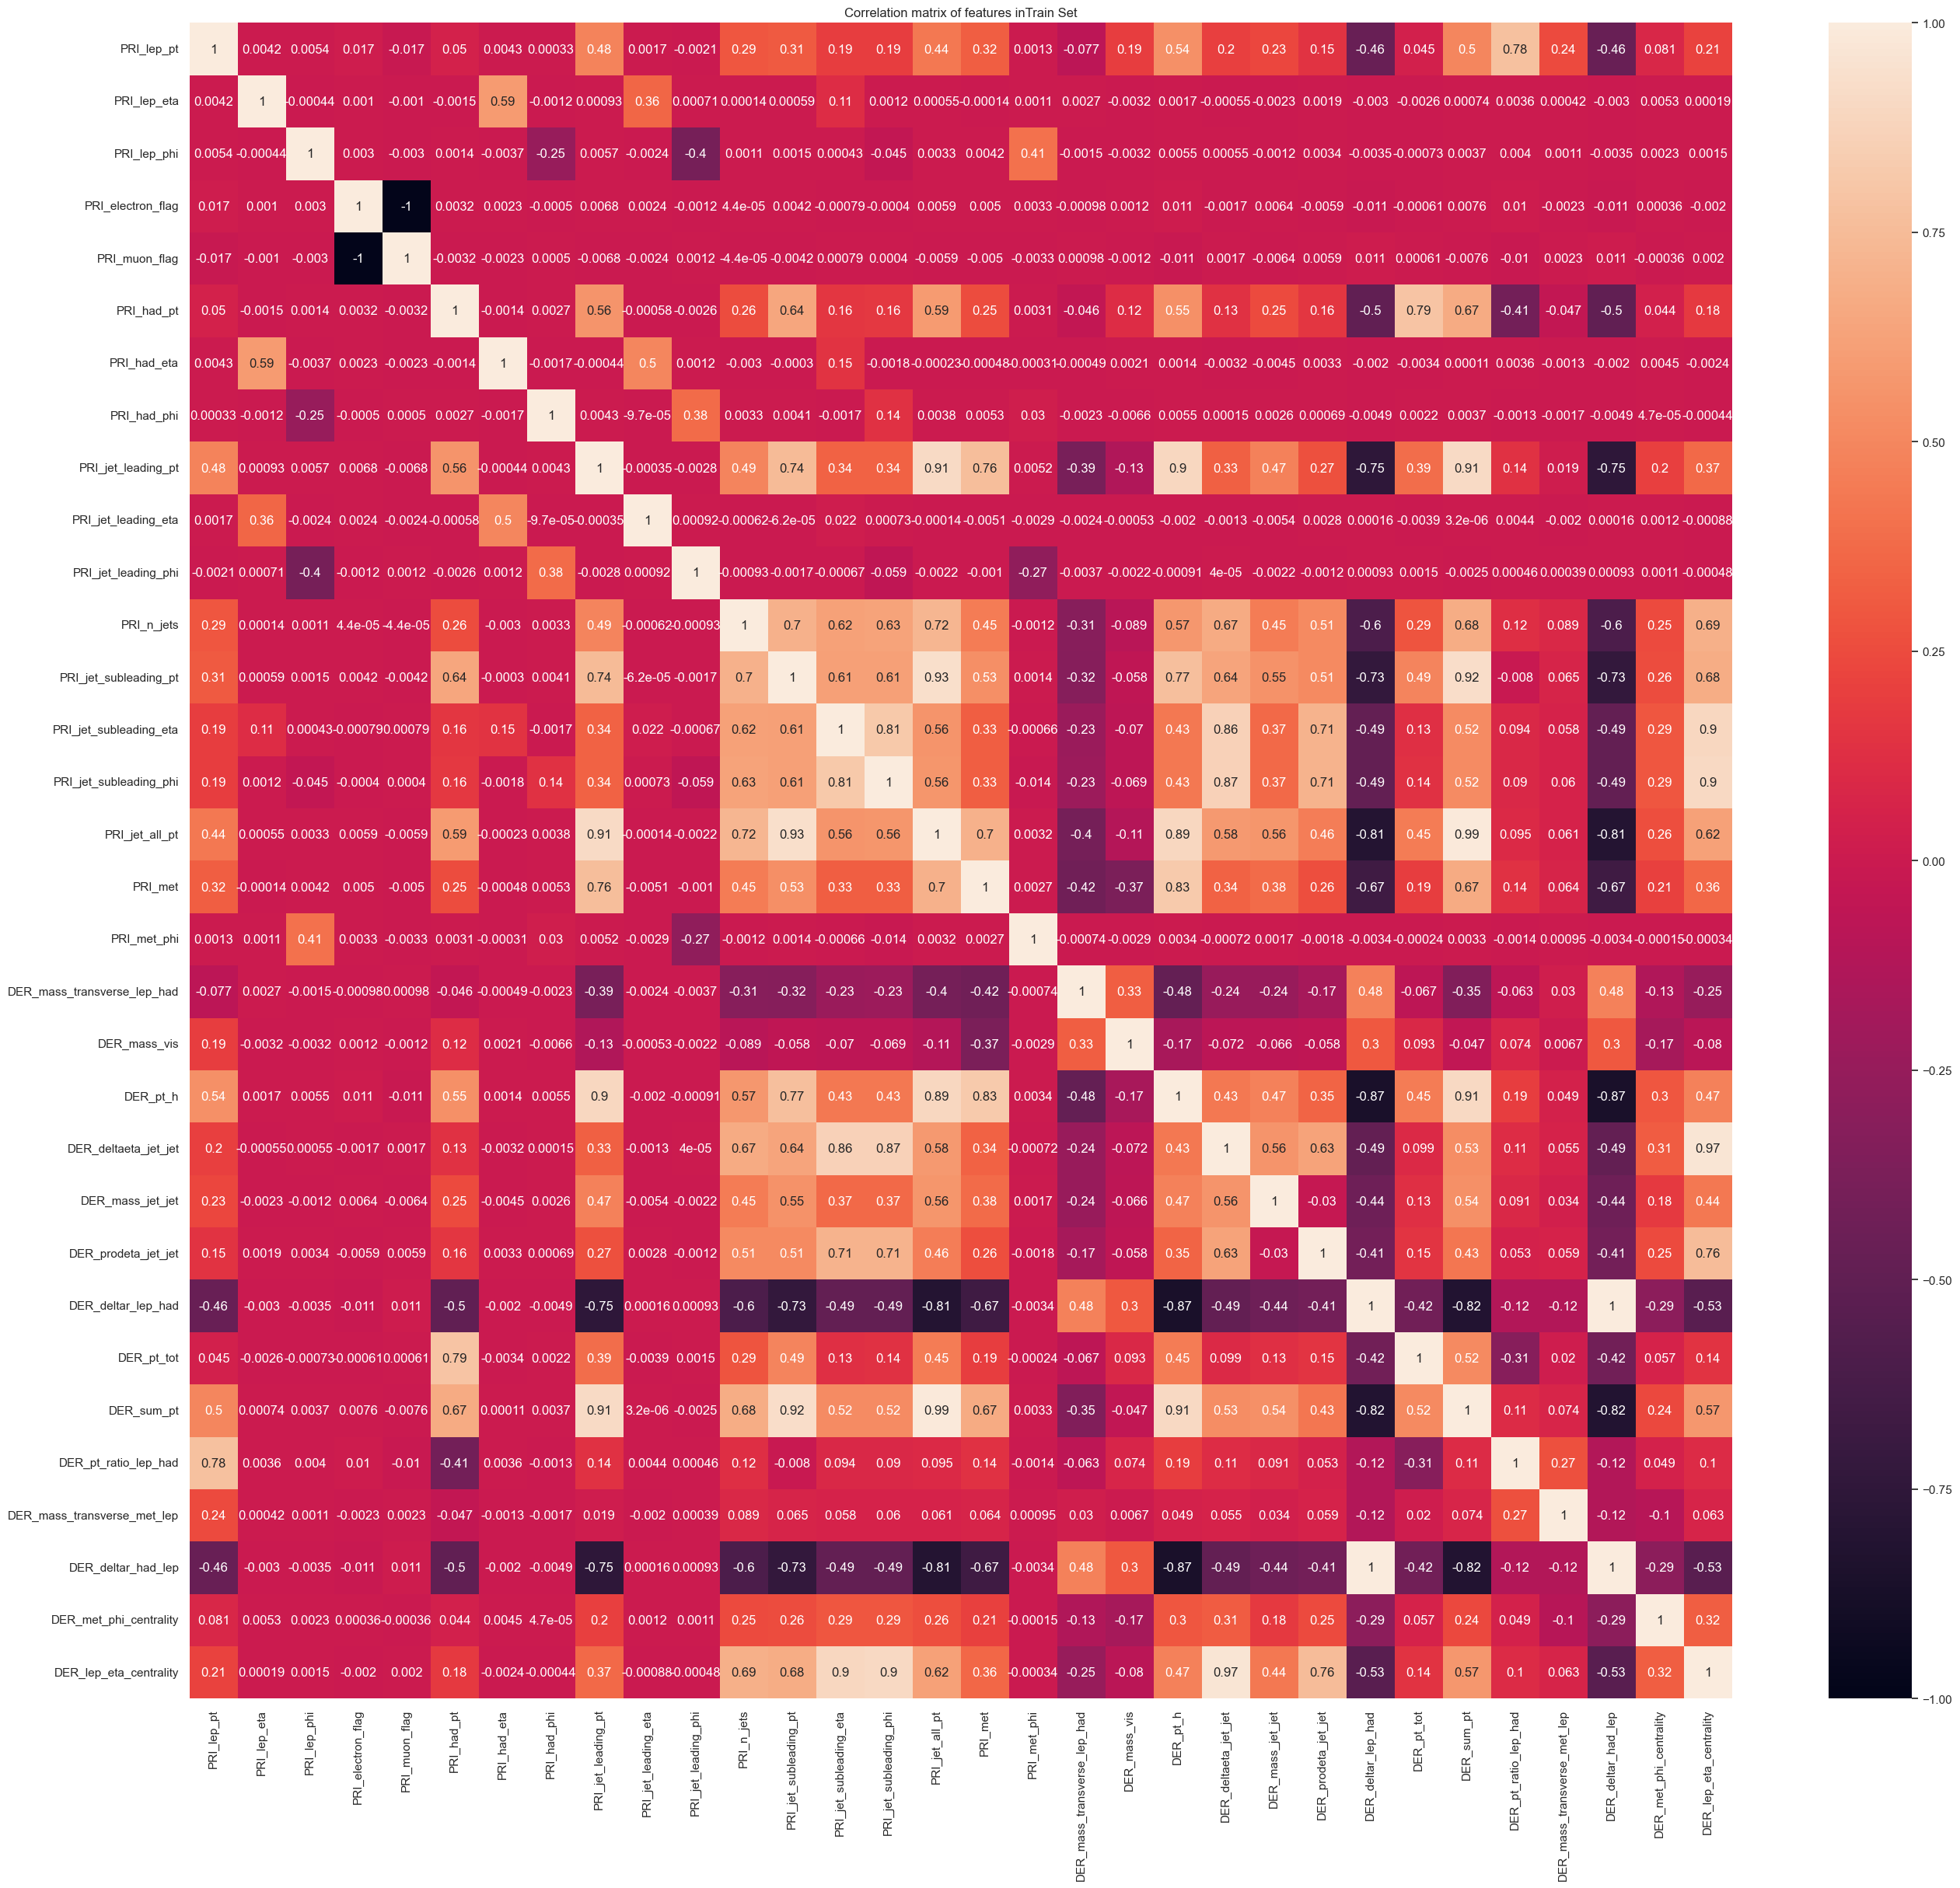

In [13]:
Train_data_vis.correlation_plots()

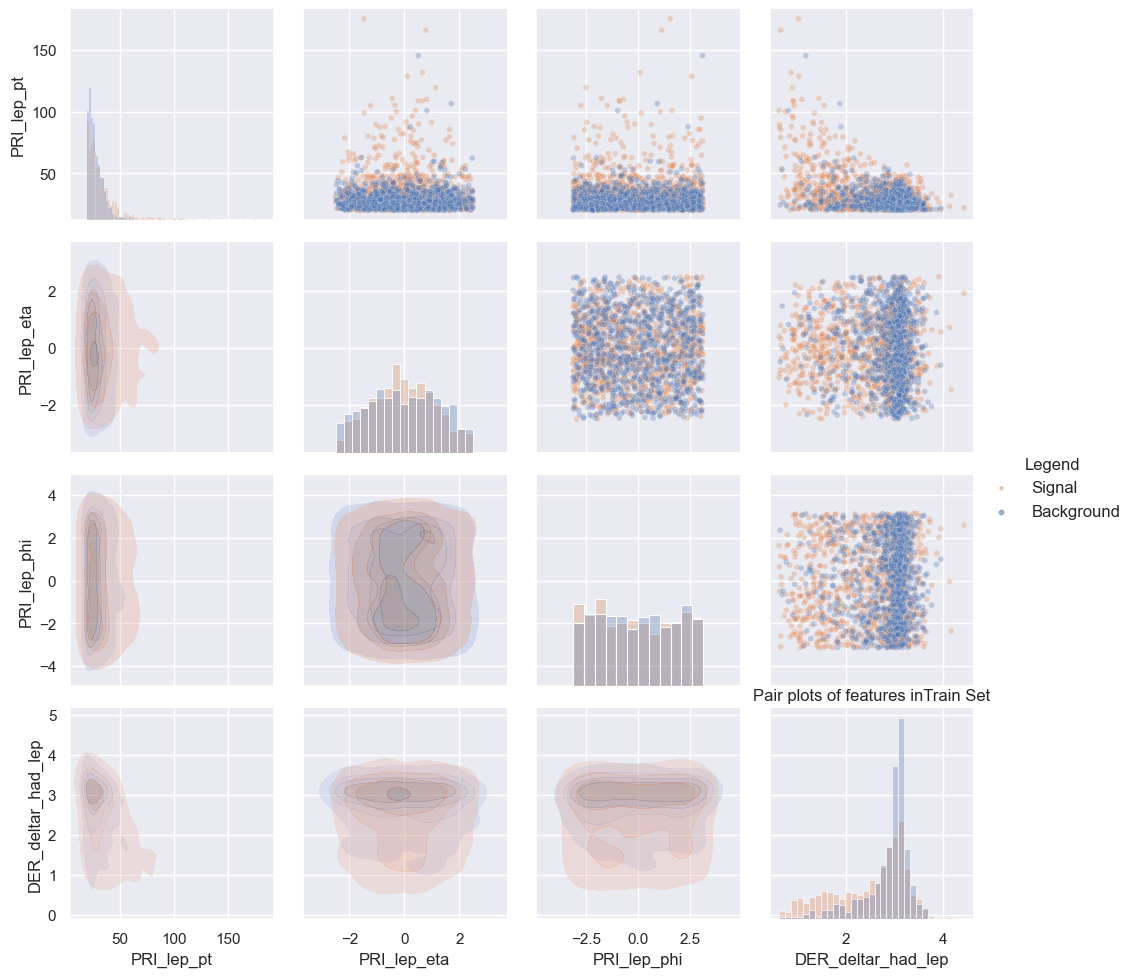

In [14]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [15]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [16]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [17]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 1.09
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102000016
sum of background 2860861.810200001
[0]	validation_0-logloss:0.60341	validation_0-auc:0.83712	validation_1-logloss:0.61354	validation_1-auc:0.67730
[1]	validation_0-logloss:0.55527	validation_0-auc:0.84471	validation_1-logloss:0.61057	validation_1-auc:0.41456
[2]	validation_0-logloss:0.52648	validation_0-auc:0.84837	validation_1-logloss:0.62544	validation_1-auc:0.41456
[3]	validation_0-logloss:0.50755	validation_0-auc:0.85170	validation_1-logloss:0.65425	validation_1-auc:0.42959
[4]	validation_0-logloss:0.49489	validation_0-auc:0.85419	validation_1-logloss:0.68990	validation_1-auc:0.40128
[5]	validation_0-logloss:0.48625	validation_0-auc:0.85638	validation_1-logloss:0.72176	validation_1-auc:0.40441
[6]	validat

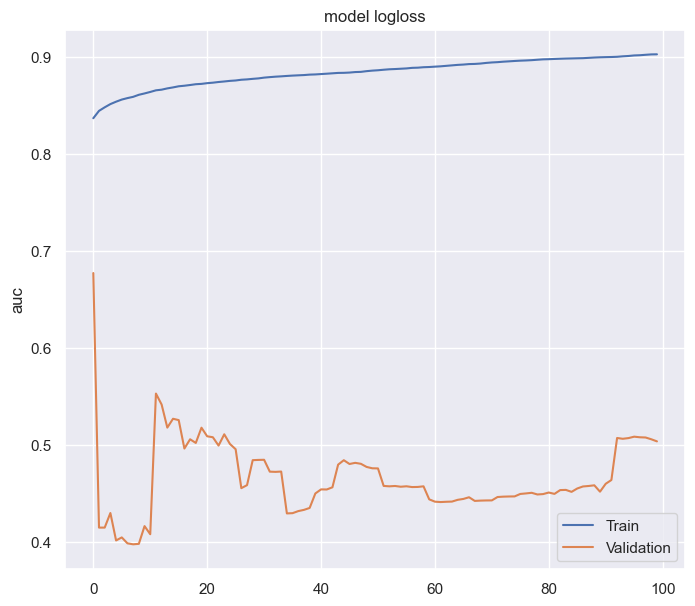

In [18]:
results = model.model.evals_result()

validationcurve(results,'auc')

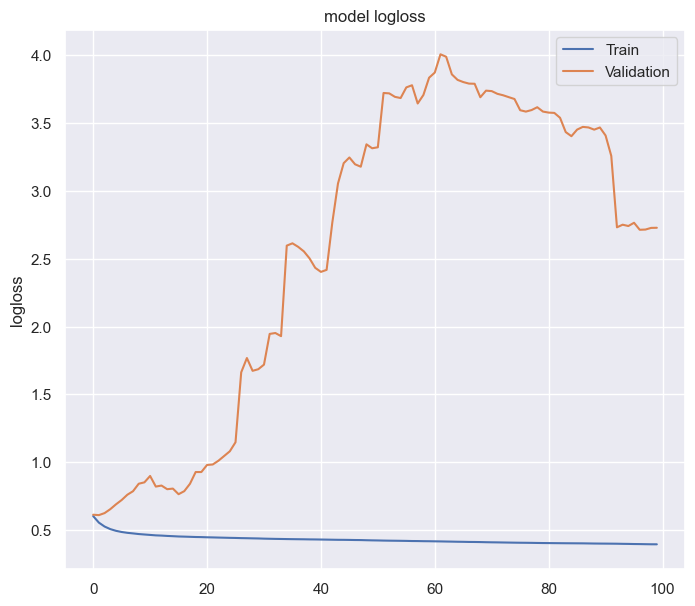

In [19]:
validationcurve(results,'logloss')

In [20]:
# lgb.plot_metric(results)

In [21]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing


[*] - Computing Test result

[*] --- AUC test : 0.8569746529346516
[*] --- total weight test: 2871156.1554242056
[*] --- total weight train: 2870527.862053715
[*] --- total weight mu_cals_set: 2870527.8620537147
[*] --- total test signal : 10294.345224205412
[*] --- total test background train: 2860861.8101999997
[*] --- Significance : 17.789123057040662
[*] --- delta_mu_stat : 0.05621412572129098
[*] --- mean N: 39919.6068 --- sigma N: 197.6655837361679
[*] --- signal: 3321.1184277427774 --- background: 37996.678124283586
[*] --- signal test: 3554.2557204164596 --- background test: 36365.53569404869 --- N_roi 39919.6068

[*] --- mu hat test :0.5790003330364066 + 0.6385181093628937 - 0.5194825567099197

[*] --- AUC test : 0.8514045531958345
[*] --- total weight test: 2876327.493165943
[*] --- total weight train: 2870527.862053715
[*] --- total weight mu_cals_set: 2870527.8620537147
[*] --- total test signal : 15465.682965942406
[*] --- total test background train: 2860861.8102
[*] --- 

## Visualise Model

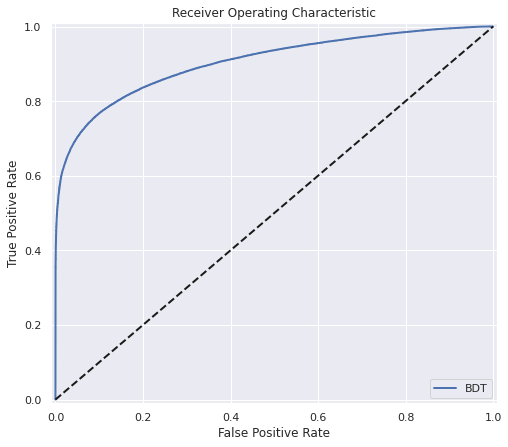

<Figure size 576x504 with 0 Axes>

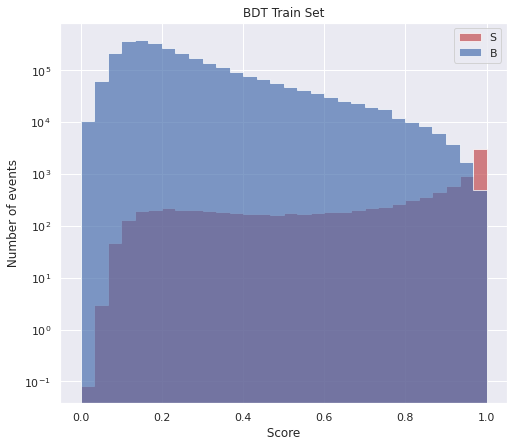

<Figure size 576x504 with 0 Axes>

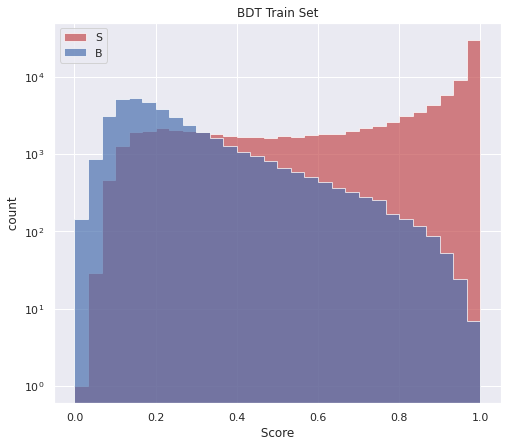

In [ ]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


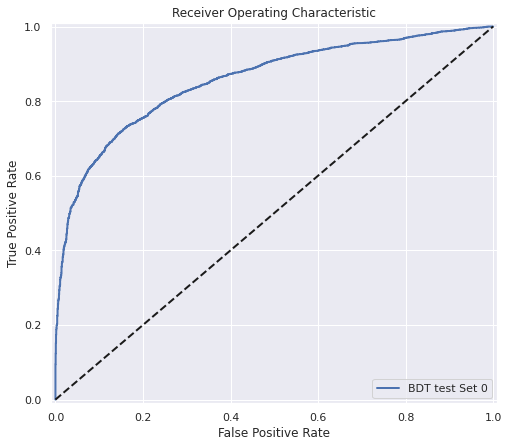

<Figure size 576x504 with 0 Axes>

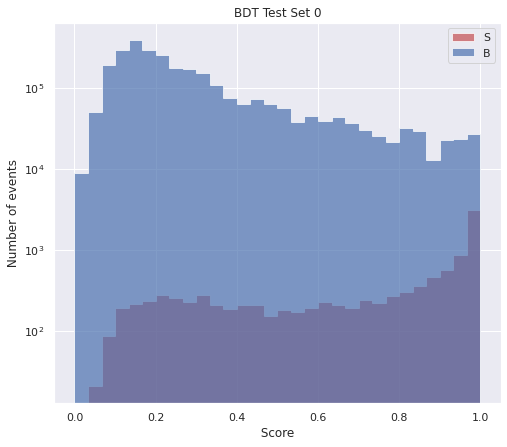

<Figure size 576x504 with 0 Axes>

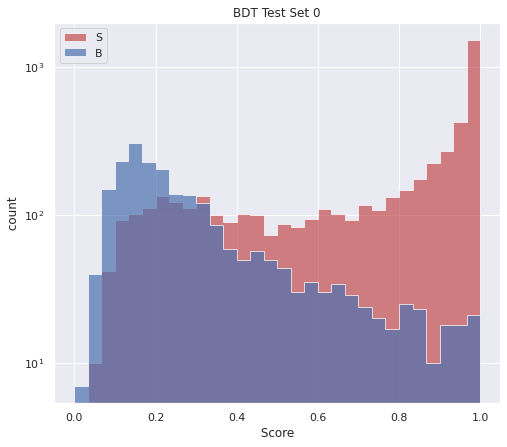

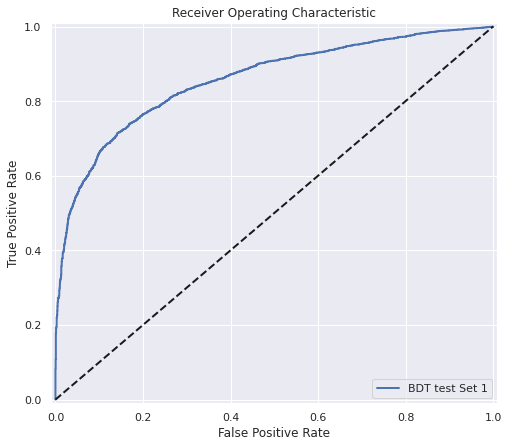

<Figure size 576x504 with 0 Axes>

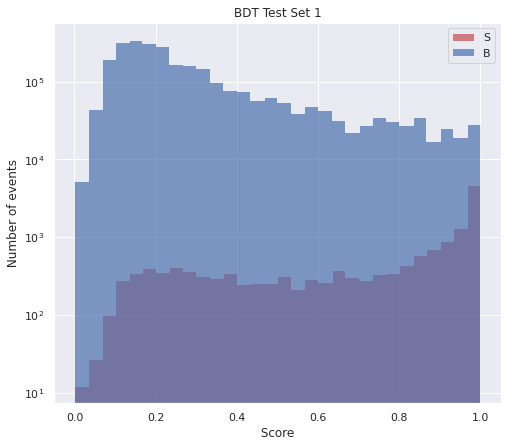

<Figure size 576x504 with 0 Axes>

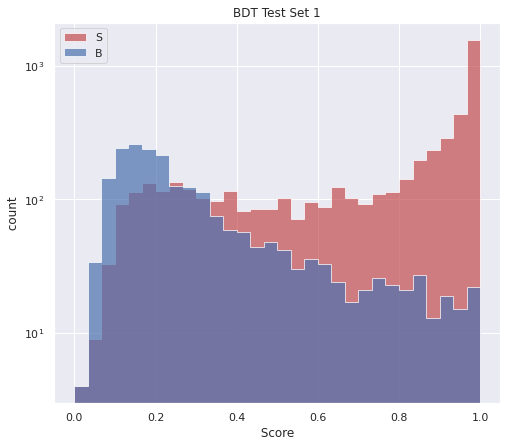

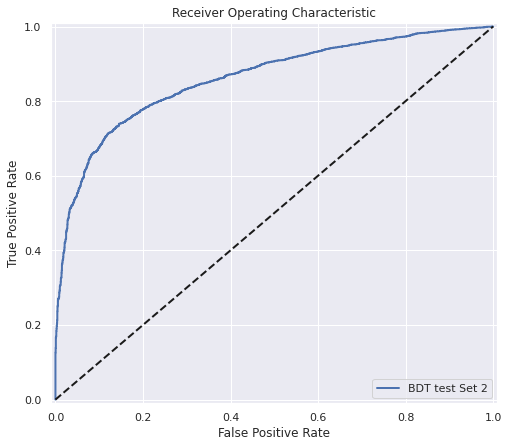

<Figure size 576x504 with 0 Axes>

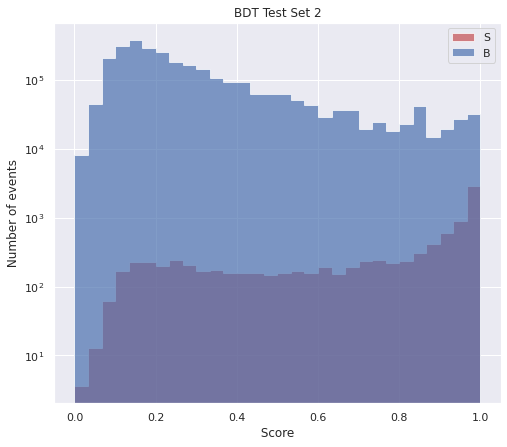

<Figure size 576x504 with 0 Axes>

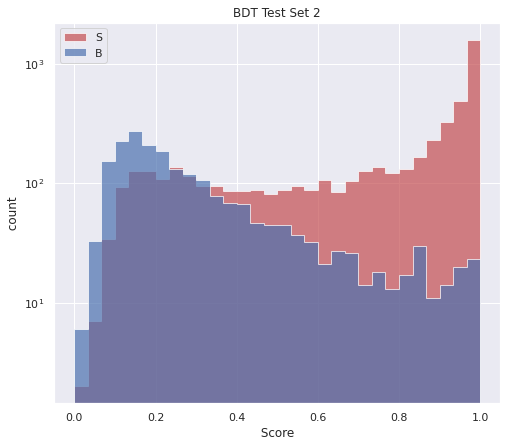

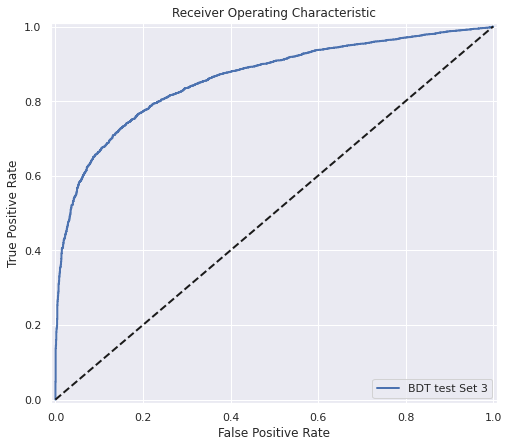

<Figure size 576x504 with 0 Axes>

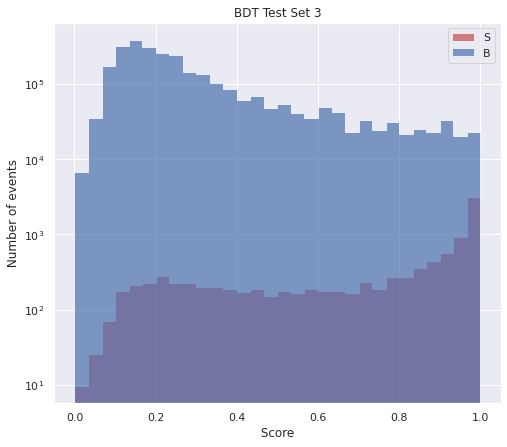

<Figure size 576x504 with 0 Axes>

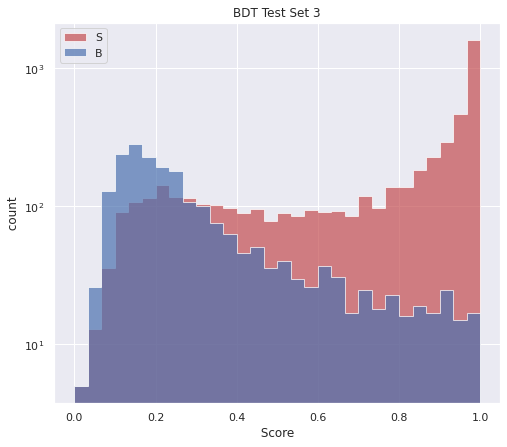

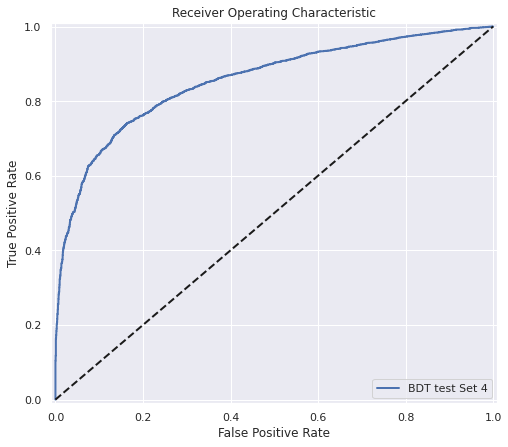

<Figure size 576x504 with 0 Axes>

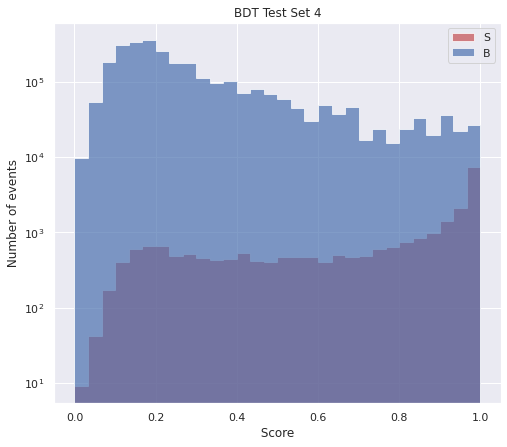

<Figure size 576x504 with 0 Axes>

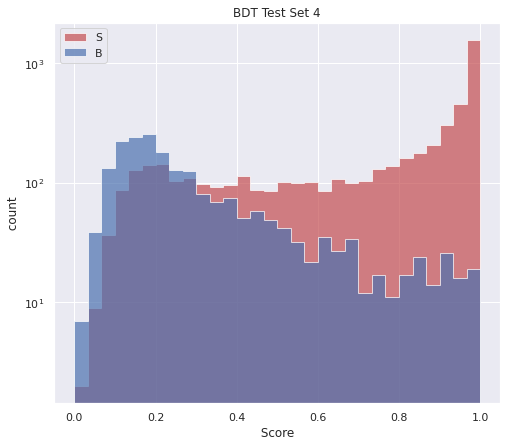

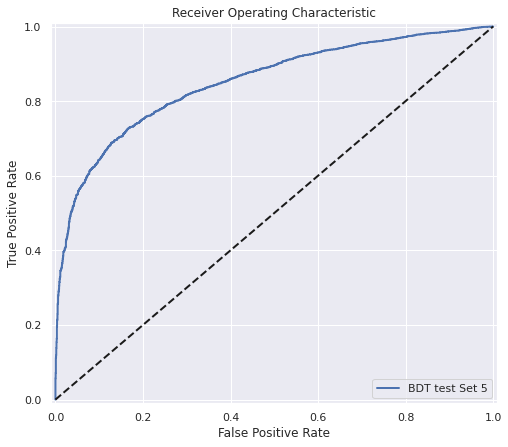

<Figure size 576x504 with 0 Axes>

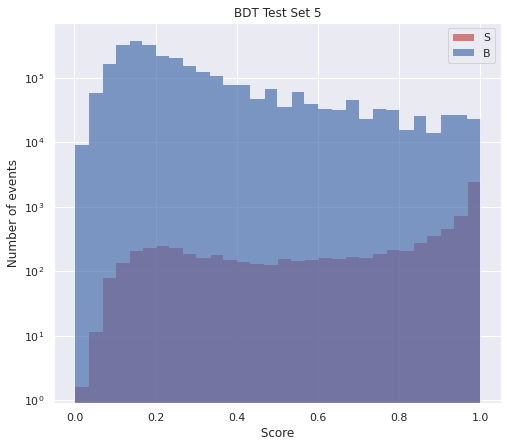

<Figure size 576x504 with 0 Axes>

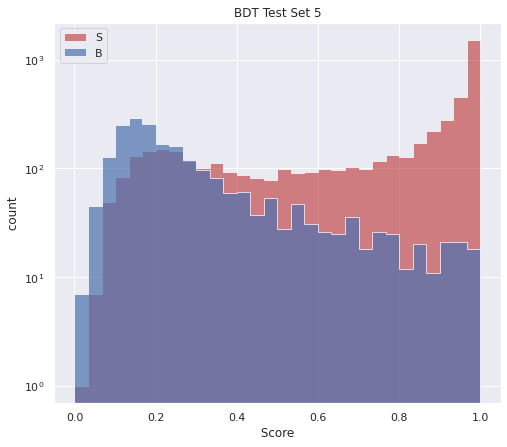

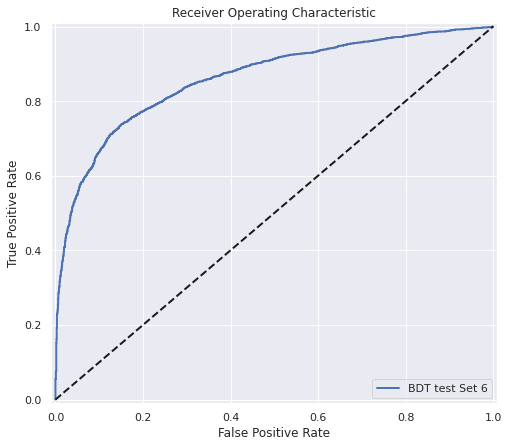

<Figure size 576x504 with 0 Axes>

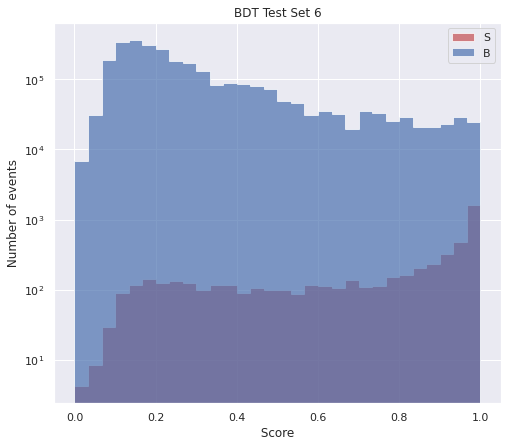

<Figure size 576x504 with 0 Axes>

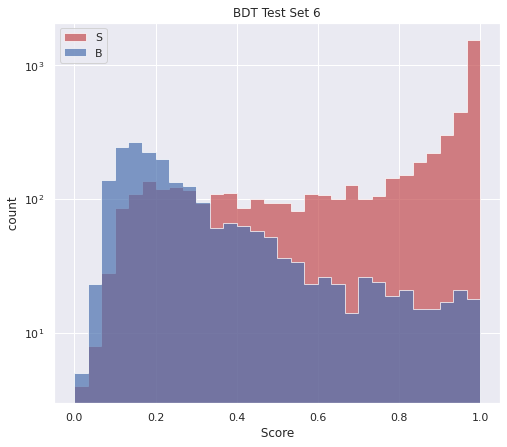

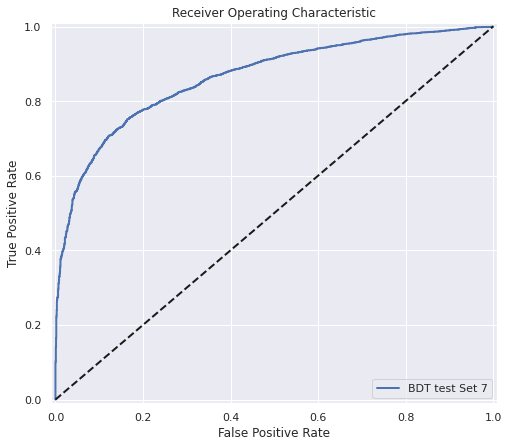

<Figure size 576x504 with 0 Axes>

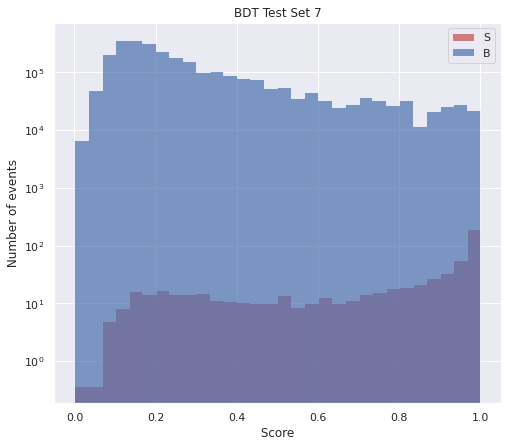

<Figure size 576x504 with 0 Axes>

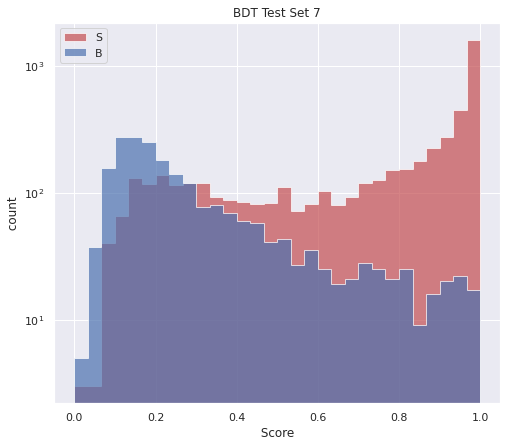

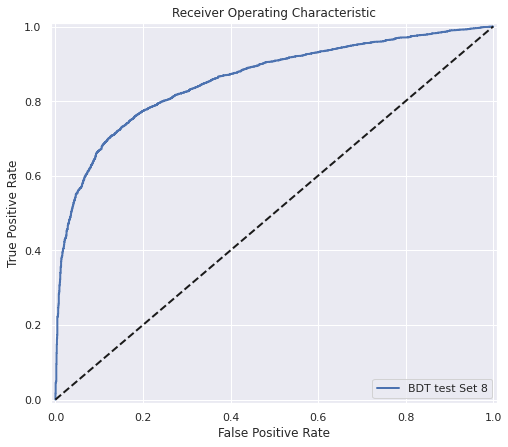

<Figure size 576x504 with 0 Axes>

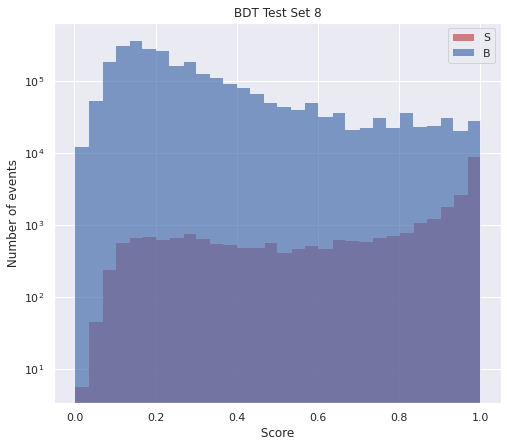

<Figure size 576x504 with 0 Axes>

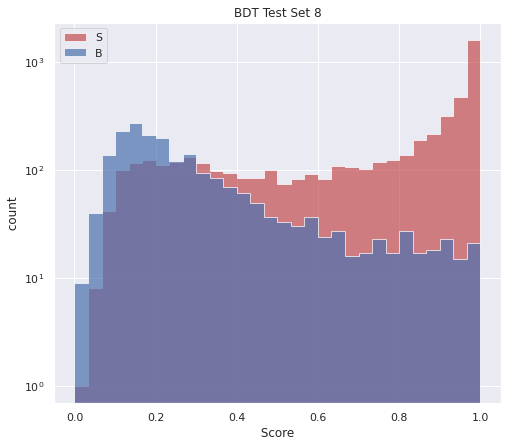

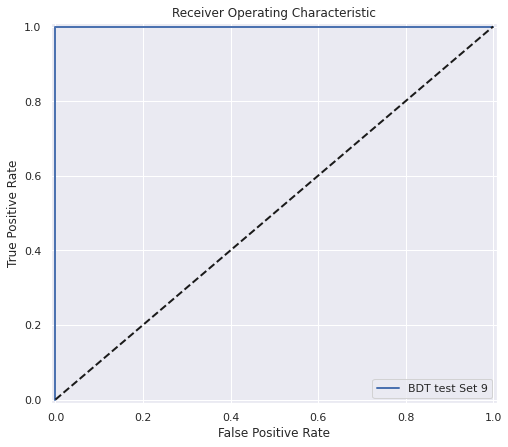

<Figure size 576x504 with 0 Axes>

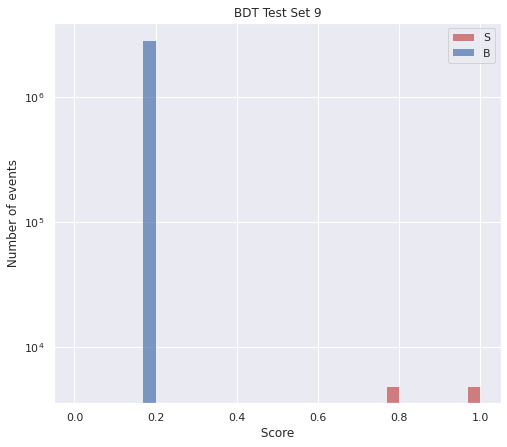

<Figure size 576x504 with 0 Axes>

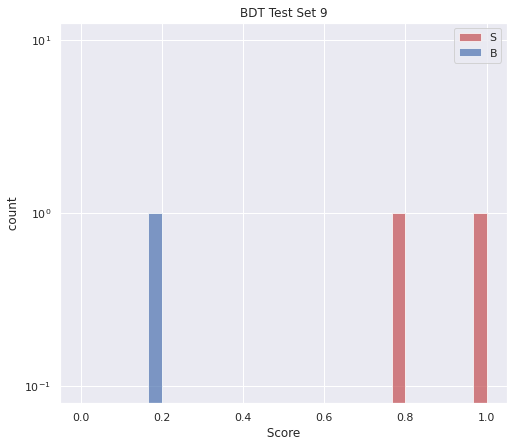

In [ ]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

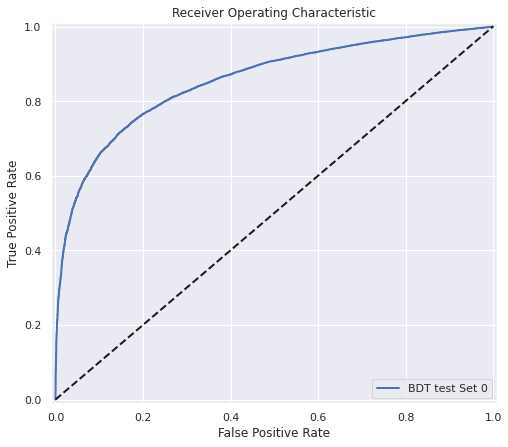

<Figure size 576x504 with 0 Axes>

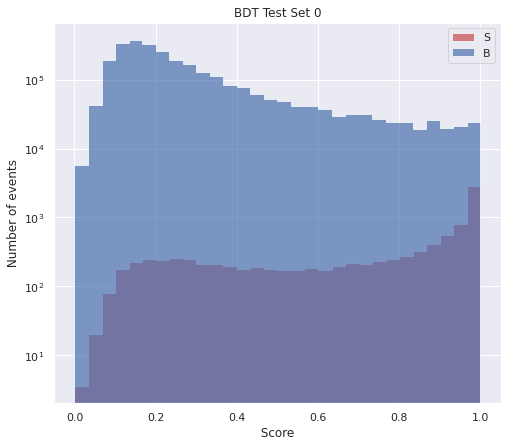

<Figure size 576x504 with 0 Axes>

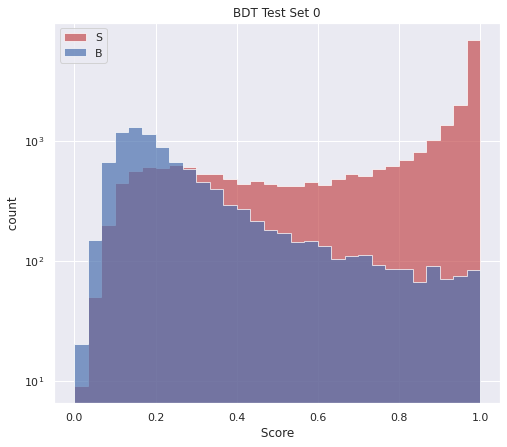

In [ ]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [ ]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: [11.564463642019776, 11.564367547789045, 11.56313099166771, 11.567237625168172, 11.561742128663184, 11.568623351767869, 11.566768780469253, 11.571897506504113, 11.561692490870596, 11.603803764340253]
[*] --- mu_hats (avg): -0.7766766463644655

---------------------------------
[✔] Total duration: 0:03:07.865603
---------------------------------


## End